In [1]:
from scipy.io import loadmat
import numpy as np
from nilearn import *
import nilearn
import matplotlib.pyplot as plt
import nibabel as nib

In [2]:
# Load data from .img file
data_img = nib.load('../DATA/HU0303_27_11_13/MOVIE1_LONG/Nifti/wrsHU0303-0901-00009-000001-01.img')
data = data_img.get_fdata()

In [3]:
masks = loadmat('MNI_allMasks.mat')
region_coords = masks['insula_l']

In [4]:
mask_data = np.zeros(data.shape)
for coord in region_coords:
    x, y, z = coord
    mask_data[int(x), int(y), int(z)] = 1

mask_img = nib.Nifti1Image(mask_data, affine=data_img.affine)

print(np.count_nonzero(mask_data),mask_data.shape[0]*mask_data.shape[1]*mask_data.shape[0])

1814 599136


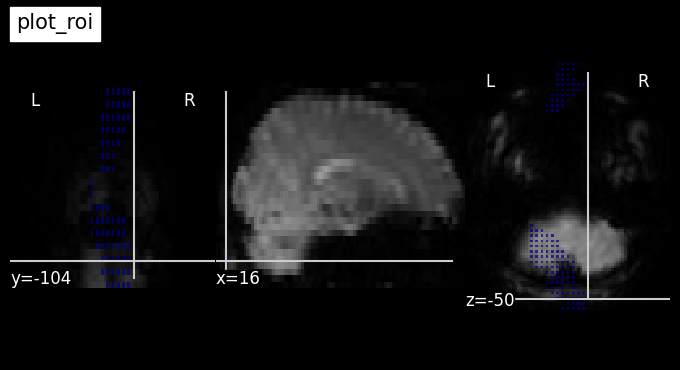

In [8]:
# Plotting
plotting.plot_roi(
    mask_img, bg_img=data_img, title="plot_roi"
)

plt.show()

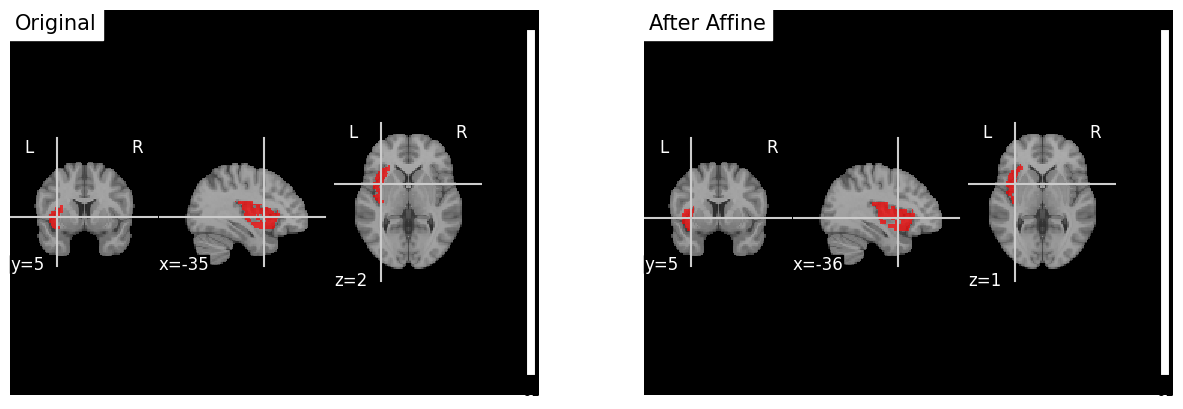

In [20]:
# Load data from .img file
data_img = nib.load('../DATA/HU0303_27_11_13/MOVIE1_LONG/Nifti/wrsHU0303-0901-00009-000001-01.img')

masks = loadmat('MNI_allMasks.mat')
region_coords = masks['insula_l']

# Create a mask using the region coordinates
mask_img = nib.load('./insula_l.nii')

# Adjust the affine of the mask to match the data
mask_img = image.resample_to_img(mask_img, target_img=data_img, interpolation='nearest')

# Plotting
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 5))

# Overlay the adjusted mask on the glass brain using plot_roi
plotting.plot_roi(roi_img=mask_img, display_mode='ortho', colorbar=True,
                  title='After Affine', axes=ax2, cmap='autumn', black_bg=True)

# Create a mask using the region coordinates
mask_img = nib.load('./insula_l.nii')

# Overlay the adjusted mask on the glass brain using plot_roi
plotting.plot_roi(roi_img=mask_img, display_mode='ortho', colorbar=True,
                  title='Original', axes=ax1, cmap='autumn', black_bg=True)

plt.show()